In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Thông tin về dữ liệu:
Dataset này hiển thị về những giao dịch được sử dụng bằng thẻ tín dụng vào ngày 13 tháng 9 năm 2013 của những người dùng ở Châu Âu.
<br>Dữ liệu này diễn ra trong 2 ngày, trong đó có 492 vụ gian lận trong số tổng 284,801 giao dịch.
<br>Loại tích cực (lừa đảo) chiếm 0,173% tổng số giao dịch.

Link Dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [83]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


###Thông tin các trường dữ liệu:
* Time: Số giây giữa mỗi giao dịch với giao dịch đầu tiên trong dataset
* Amount: Số tiền giao dịch
* Class: Nhận giá trị 1 nếu là giao dịch gian lận, 0 là bình thường
* V1-V28: Các thành phần chính (principal components) của dataset, kết quả của phép biến đổi PCA.

In [61]:
print("Kích thước data: %d hàng, %d cột" %df.shape)

Kích thước data: 284807 hàng, 31 cột


Trước hết ta sẽ kiểm tra bộ dữ liệu liệu có các giá NaN và thay thế nó:

In [62]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [63]:
no_class_0  = df['Class'].value_counts()[0]
no_class_1  = df['Class'].value_counts()[1]
print(f'{no_class_0} giao dịch bình thường chiếm {round(no_class_0/len(df) *100,2)}% dữ liệu trên')
print(f'{no_class_1} giao dịch gian lận chiếm {round(no_class_1/len(df) *100,3)}% dữ liệu trên')

284315 giao dịch bình thường chiếm 99.83% dữ liệu trên
492 giao dịch gian lận chiếm 0.173% dữ liệu trên


In [64]:
duplicated = df[df.duplicated()]#Kiểm tra dữ liệu trùng
duplicated

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [65]:
df.drop(duplicated.index, axis=0 ,inplace=True)#Xoá dữ liệu trùng

In [66]:
print('Kích thước hiện tại:', df.shape)

Kích thước hiện tại: (283726, 31)


In [67]:
df_train = df

### Kiểm tra dữ liệu sau khi xoá có bị thiếu:



In [68]:
print(f'Output True nếu có missing data: {df.isnull().any().any()}')

Output True nếu có missing data: False


### Kiểm tra tính cân bằng của dữ liệu:

Text(0.5, 1.0, 'Phân bố loại giao dịch \n (0: Bình thường || 1: Gian lận)')

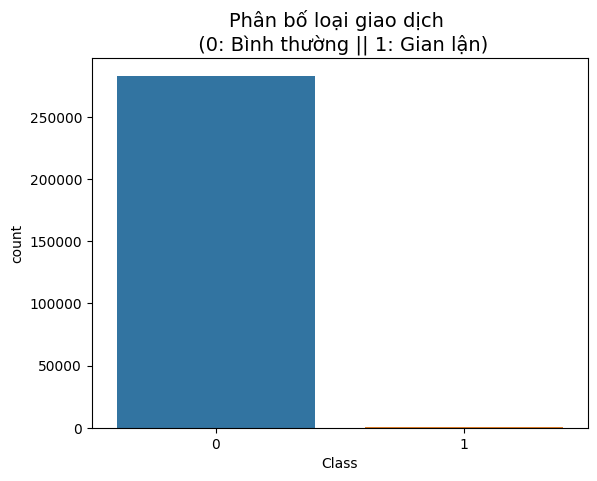

In [69]:
sns.countplot(x='Class', data=df)
plt.title('Phân bố loại giao dịch \n (0: Bình thường || 1: Gian lận)', fontsize=14)

**Dựa vào đồ thị ta có thể thấy:**
*   Trường Target rất mất cân bằng. Hầu hết các giao dịch trong tập dữ liệu là bình thường!
*   Sẽ xảy ra tình trạng overfit

Để giải quyết tình trạng này. Trong đồ án này, một kĩ thuật để xử lý tình trạng quá lệch dữ liệu là Under-Sampling - giảm số lượng các quan sát của nhóm đa số để nó trở nên cân bằng với số quan sát của nhóm thiểu số, từ đó tạo ra bộ dữ liệu con nhỏ hơn với tỉ lệ là 50/50 cho 2 loại giao dịch.

###Xử lý dữ liệu:
Chỉnh tỉ lệ dữ liệu, vì dữ liệu của chúng ta khá lệch lạc, chúng ta sẽ sử dụng MinMaxScaler() để đảm bảo tất cả các giá trị nằm trong khoảng từ -1 đến 1.

In [70]:
X=df
y=df["Class"]

In [71]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(X)

scaled_X = pd.DataFrame(scaled_data, columns=X.columns)

In [72]:
scaled_X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,...,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0.0
1,0.000000,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,...,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0.0
2,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,...,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0.0
3,0.000006,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,...,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0.0
4,0.000012,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,...,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283721,0.999965,0.756448,0.873531,0.666991,0.160317,0.729603,0.236810,0.235393,0.863749,0.528729,...,0.564920,0.515249,0.680500,0.313600,0.658558,0.466291,0.433929,0.329840,0.000030,0.0
283722,0.999971,0.945845,0.766677,0.872678,0.219189,0.771561,0.273661,0.265504,0.788548,0.482925,...,0.564933,0.553153,0.665619,0.245298,0.543855,0.360884,0.417775,0.312038,0.000965,0.0
283723,0.999977,0.990905,0.764080,0.781102,0.227202,0.783425,0.293496,0.263547,0.792985,0.477677,...,0.565220,0.537005,0.664877,0.468492,0.592824,0.411177,0.416593,0.312585,0.002642,0.0
283724,0.999977,0.954209,0.772856,0.849587,0.282508,0.763172,0.269291,0.261175,0.792671,0.476287,...,0.565755,0.547353,0.663008,0.398836,0.545958,0.514746,0.418520,0.315245,0.000389,0.0


###Thực hiện cân bằng dữ liệu:


In [73]:
normal  = scaled_X[scaled_X['Class'] == 0]
fraud  = scaled_X[scaled_X['Class'] == 1]
print(f'{len(normal)} giao dịch bình thường chiếm {round(len(normal)/len(df) *100,2)}% dữ liệu trên')
print(f'{len(fraud)} giao dịch gian lận chiếm {round(len(fraud)/len(df) *100,3)}% dữ liệu trên')

283253 giao dịch bình thường chiếm 99.83% dữ liệu trên
473 giao dịch gian lận chiếm 0.167% dữ liệu trên


Lúc này sẽ chỉ có 473 bản ghi gian lận và hơn 280.000 bản ghi bình thường. Vì vậy, chúng ta sẽ chỉ giữ lại 473 bản ghi bình thường như một thử nghiệm, chúng ta có thể thử với nhiều bản ghi bình thường hơn sau này. (Nghĩa là số bản ghi gian lận = số bản ghi bình thường)

In [74]:
normal_sample = normal.sample(n=473)
df = pd.concat([normal_sample,fraud], axis=0)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
65902,0.300448,0.978762,0.768660,0.839028,0.300192,0.767299,0.266743,0.265214,0.786280,0.474364,...,0.557561,0.482267,0.664117,0.248837,0.610155,0.359393,0.417215,0.313413,0.000901,0.0
220460,0.824639,0.958981,0.766100,0.815468,0.296471,0.780684,0.256280,0.268345,0.785024,0.452203,...,0.566979,0.553417,0.667845,0.223192,0.494596,0.324314,0.423116,0.320315,0.000297,0.0
25611,0.195223,0.922515,0.758079,0.865406,0.278091,0.776494,0.254212,0.269962,0.777343,0.462749,...,0.550084,0.488793,0.678422,0.379934,0.602140,0.459998,0.411349,0.298045,0.000139,0.0
187723,0.740520,0.997523,0.751453,0.815250,0.181337,0.758025,0.256301,0.258808,0.783558,0.429714,...,0.558871,0.508652,0.667093,0.279340,0.573156,0.417752,0.416424,0.311879,0.001261,0.0
204846,0.786043,0.958408,0.776547,0.835573,0.327848,0.773224,0.264218,0.276022,0.780553,0.407267,...,0.566377,0.554466,0.664369,0.481790,0.577740,0.399315,0.416335,0.312188,0.004686,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278813,0.978876,0.925541,0.779136,0.759117,0.329475,0.755171,0.242806,0.259977,0.792864,0.391646,...,0.574031,0.495141,0.674930,0.342499,0.608078,0.554231,0.421913,0.316127,0.015180,1.0
279090,0.980063,0.981714,0.780863,0.750697,0.314516,0.768696,0.249683,0.256746,0.788051,0.423943,...,0.567454,0.511348,0.663271,0.371313,0.607201,0.546239,0.423694,0.316911,0.000030,1.0
279096,0.980086,0.946807,0.779143,0.799053,0.272690,0.758173,0.262986,0.251741,0.798367,0.440311,...,0.573599,0.548942,0.668269,0.386556,0.536386,0.502403,0.423619,0.317068,0.003032,1.0
280081,0.983645,0.905394,0.773440,0.743844,0.332480,0.760057,0.233425,0.251904,0.796742,0.406549,...,0.570882,0.497472,0.658660,0.357486,0.559486,0.524456,0.432844,0.307976,0.009536,1.0


###Trực quan hoá dữ liệu:


Text(0.5, 1.0, 'Phân bố loại giao dịch \n (0: Bình thường || 1: Gian lận)')

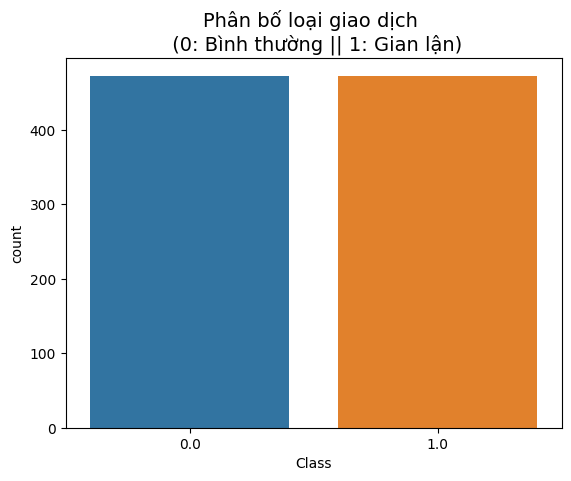

In [75]:
sns.countplot(x='Class', data=df)
plt.title('Phân bố loại giao dịch \n (0: Bình thường || 1: Gian lận)', fontsize=14)

Đồ thị lúc này thể hiện bộ dữ liệu mới được cân bằng hơn. Tránh tình trạng xảy ra overfit.


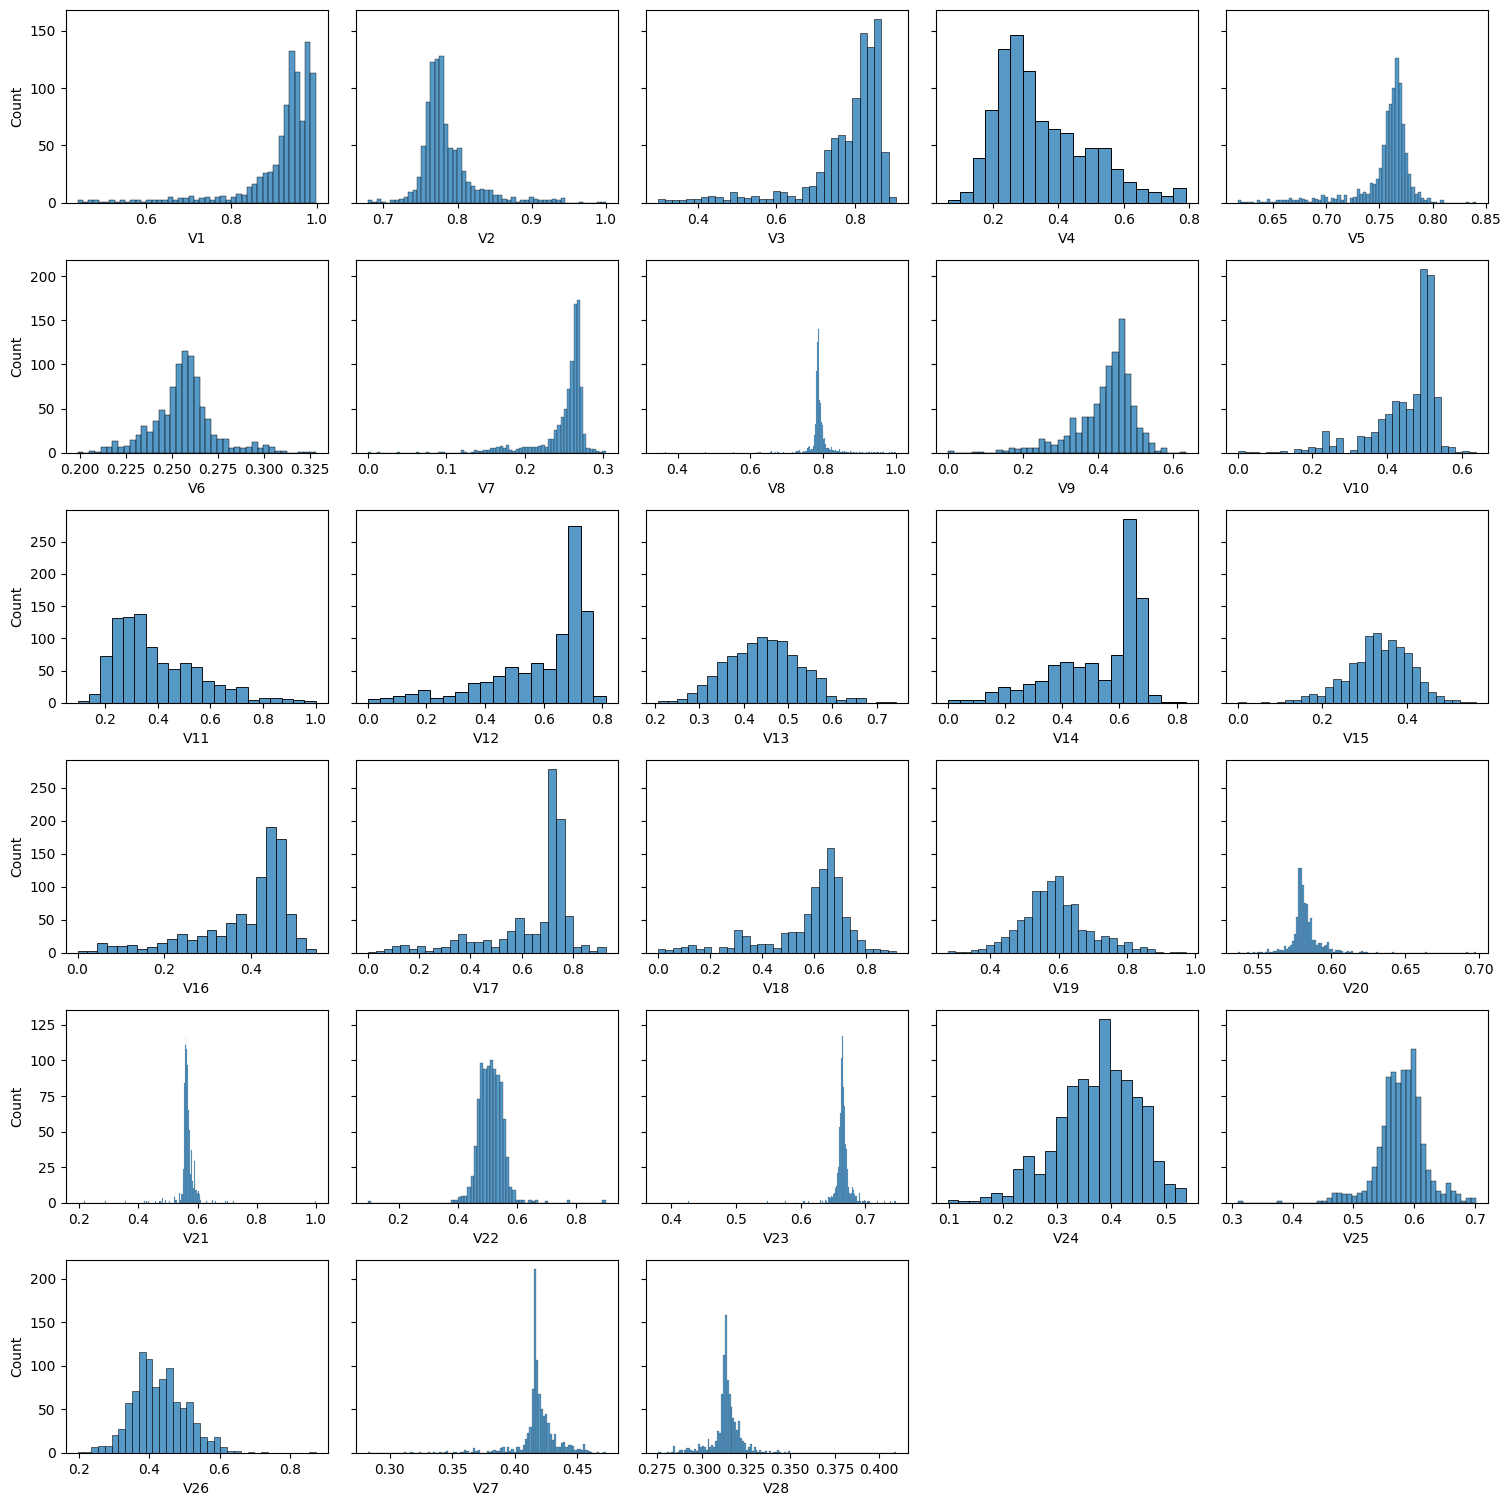

In [76]:
fig, ax = plt.subplots(ncols=5, nrows=6, figsize=(15,15), sharey='row')
index = 0
ax = ax.flatten()

for col in df.columns.values:
    if col not in ['Time', 'Amount', 'Class']:
        sns.histplot(df[col], ax=ax[index])
        index += 1
ax[28].set_visible(False)
ax[29].set_visible(False)
plt.tight_layout(pad=0.5, w_pad=1.0, h_pad=1.0)

### Sử dụng Scikit-learn để chia dữ liệu thành tập huấn luyện và kiểm tra.


In [77]:
y = df['Class']
df.drop('Class', axis = 1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
65902,0.300448,0.978762,0.768660,0.839028,0.300192,0.767299,0.266743,0.265214,0.786280,0.474364,...,0.578830,0.557561,0.482267,0.664117,0.248837,0.610155,0.359393,0.417215,0.313413,0.000901
220460,0.824639,0.958981,0.766100,0.815468,0.296471,0.780684,0.256280,0.268345,0.785024,0.452203,...,0.580173,0.566979,0.553417,0.667845,0.223192,0.494596,0.324314,0.423116,0.320315,0.000297
25611,0.195223,0.922515,0.758079,0.865406,0.278091,0.776494,0.254212,0.269962,0.777343,0.462749,...,0.575450,0.550084,0.488793,0.678422,0.379934,0.602140,0.459998,0.411349,0.298045,0.000139
187723,0.740520,0.997523,0.751453,0.815250,0.181337,0.758025,0.256301,0.258808,0.783558,0.429714,...,0.574941,0.558871,0.508652,0.667093,0.279340,0.573156,0.417752,0.416424,0.311879,0.001261
204846,0.786043,0.958408,0.776547,0.835573,0.327848,0.773224,0.264218,0.276022,0.780553,0.407267,...,0.586348,0.566377,0.554466,0.664369,0.481790,0.577740,0.399315,0.416335,0.312188,0.004686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278813,0.978876,0.925541,0.779136,0.759117,0.329475,0.755171,0.242806,0.259977,0.792864,0.391646,...,0.593606,0.574031,0.495141,0.674930,0.342499,0.608078,0.554231,0.421913,0.316127,0.015180
279090,0.980063,0.981714,0.780863,0.750697,0.314516,0.768696,0.249683,0.256746,0.788051,0.423943,...,0.582673,0.567454,0.511348,0.663271,0.371313,0.607201,0.546239,0.423694,0.316911,0.000030
279096,0.980086,0.946807,0.779143,0.799053,0.272690,0.758173,0.262986,0.251741,0.798367,0.440311,...,0.582906,0.573599,0.548942,0.668269,0.386556,0.536386,0.502403,0.423619,0.317068,0.003032
280081,0.983645,0.905394,0.773440,0.743844,0.332480,0.760057,0.233425,0.251904,0.796742,0.406549,...,0.583526,0.570882,0.497472,0.658660,0.357486,0.559486,0.524456,0.432844,0.307976,0.009536


In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df, y, test_size = 0.2, random_state = 42)

### Random Forest Classifier
Xây dựng model phân loại Random Forest và sử dụng để dự đoán dữ liệu


In [79]:
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
from sklearn.metrics import confusion_matrix

In [80]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, max_depth = 2)
rfc.fit(X_train,Y_train)
y_pred = rfc.predict(X_test)

### Đánh giá model
In tất cả các điểm số của bộ phân loại. Sử dụng module `metrics`. Module này sẽ có các hàm in một báo cáo về độ chính xác, độ nhạy, F1-score,.. và hỗ trợ cho mỗi lớp trong bộ phân loại.



In [81]:
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
from sklearn.metrics import confusion_matrix
n_outliers = len(fraud)
n_errors = (y_pred != Y_test).sum()
print("Mô hình sử dụng là Random Forest classifier")
acc= accuracy_score(Y_test,y_pred)
print("Mức accuracy:  {}".format(acc))
prec= precision_score(Y_test,y_pred)
print("Mức precision: {}".format(prec))
rec= recall_score(Y_test,y_pred)
print("Dộ nhạy: {}".format(rec))
f1= f1_score(Y_test,y_pred)
print("F1-Score: {}".format(f1))
MCC=matthews_corrcoef(Y_test,y_pred)
print("Hệ số tương quan Matthew:{}".format(MCC))

Mô hình sử dụng là Random Forest classifier
Mức accuracy:  0.9315789473684211
Mức precision: 1.0
Dộ nhạy: 0.8725490196078431
F1-Score: 0.9319371727748691
Hệ số tương quan Matthew:0.8719178458750276


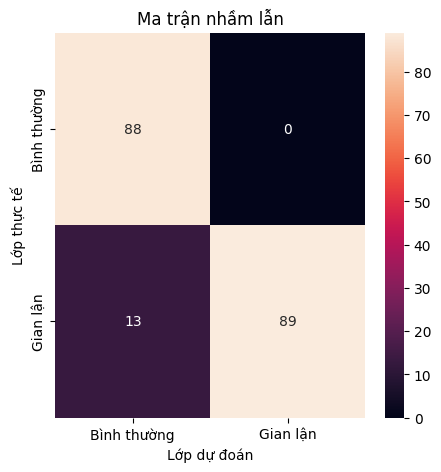

In [84]:
LABELS = ['Bình thường', 'Gian lận']
conf_matrix = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, xticklabels=LABELS,
            yticklabels=LABELS, annot=True, fmt="d");
plt.title('Ma trận nhầm lẫn')
plt.ylabel('Lớp thực tế')
plt.xlabel('Lớp dự đoán')
plt.show()

In [85]:
# Run classification metrics
plt.figure(figsize=(9, 7))
print('{}: {}'.format("Random Forest", n_errors))
print(accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

Random Forest: 13
0.9315789473684211
              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93        88
         1.0       1.00      0.87      0.93       102

    accuracy                           0.93       190
   macro avg       0.94      0.94      0.93       190
weighted avg       0.94      0.93      0.93       190



<Figure size 900x700 with 0 Axes>